# House Pricing

- This is simple project taken up to understand the fullstack developers 
- Using Linear Regression to predict the price of an house based on some features.
- The data set is taken from `sklearn` and the location selected is **Boston**

# Import important packages

In [40]:
import pandas as pd
import sklearn
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn
import pickle

# load the data set

In [41]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/y3/gkk69rb15yq9_d5mhj2rp8400000gn/T/ipykernel_18823/16828617.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [42]:
# create a Data frame from the avaialble da
features = ['CRIM',  'ZN'  , 'INDUS'   , 'CHAS' , 'NOX' , 'RM' , 'AGE' , 'DIS' , 'RAD' , 'TAX' , 'PTRATIO' , 'B' , 'LSTAT']

boston_df = pd.DataFrame(data, columns = features)

In [43]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [44]:
# data cleaning
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [45]:
# output feature - price 
boston_df['PRICE'] = target

In [46]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [47]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: xlabel='LSTAT', ylabel='PRICE'>

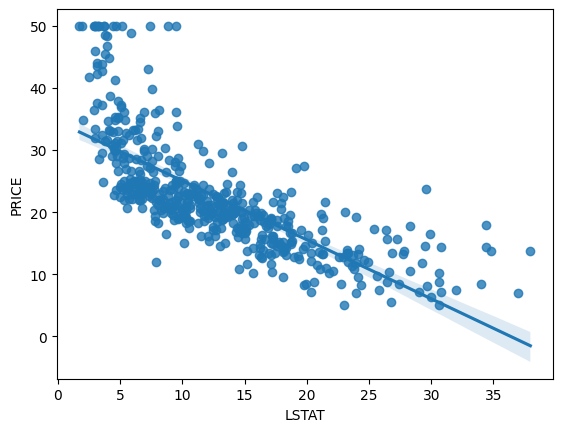

In [48]:
sbn.regplot(x= 'LSTAT', y = 'PRICE', data = boston_df)

In [49]:
X = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]

In [50]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

# Prepare data for training 

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# taking the default value for test train split 
X_train, X_test, y_train, y_test  = train_test_split(X,y)

In [53]:
X_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
344,0.03049,55.0,3.78,0.0,0.484,6.874,28.1,6.4654,5.0,370.0,17.6,387.97,4.61
389,8.15174,0.0,18.10,0.0,0.700,5.390,98.9,1.7281,24.0,666.0,20.2,396.90,20.85
227,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
79,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
133,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03


In [54]:
from sklearn.preprocessing import StandardScaler

# instance
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [55]:
X_train

array([[-0.43024076,  0.61062998, -0.92265532, ...,  0.56425142,
         0.38496313, -0.81985154],
       [-0.42821082,  0.61062998, -0.92265532, ...,  0.56425142,
         0.25427688,  0.23251741],
       [-0.44481968,  1.90461243, -1.1205603 , ..., -0.41436637,
         0.35685521, -1.13223019],
       ...,
       [-0.44289676, -0.46768873, -1.17480092, ..., -0.32116468,
         0.40052101, -0.54912338],
       [-0.40961553, -0.46768873,  1.53429832, ...,  1.26326413,
         0.364323  ,  0.31443004],
       [-0.43304811, -0.46768873, -0.20726548, ..., -0.32116468,
        -0.15489552,  0.36163392]], shape=(379, 13))

# Training the model 
- Using `sklearn`

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
linear_regression = LinearRegression()

In [58]:
linear_regression.fit(X_train,y_train)

LinearRegression()

# Prediction 

In [59]:
reg_predict = linear_regression.predict(X_test)

In [60]:
reg_predict

array([33.55902028, 22.08835475,  8.89124925, 26.71185522, 19.57710947,
       24.3594403 , 19.32623477, 31.95580105, 24.32688757, 16.09560058,
       20.60120708, 24.91834447, 20.68587119, 34.31297002,  9.11849973,
       25.65267454, 14.84299632, 12.74278388, 23.15037235, 17.90521099,
       35.13300316, 29.58861013, 20.92239849, 25.58505949, 43.52343748,
       13.32696121, 29.94346462, 16.51979067, 20.44818865, 24.0509148 ,
       39.34881894, 13.744452  , 30.33514672, 19.91682445, 28.39004963,
       18.15272983, 19.6769546 , 24.74143022, 22.48043236, 21.9236801 ,
       38.96315022, 21.23057311, 17.16140327, 21.97374653, 33.39855601,
       14.83908473, 24.53216067, 24.78164003, 29.14344025, 21.08079442,
       19.15994581, 20.14595712, 20.29043108, 27.2507262 , 24.51578205,
       32.65550789, 16.03418408, 19.05495313, 17.48928712, 20.35745958,
       33.15316441, 20.05159756, 12.19772721, 28.81487471, 22.59312136,
       30.70880004, 29.51901301, 24.26049725,  7.53814766, 16.10

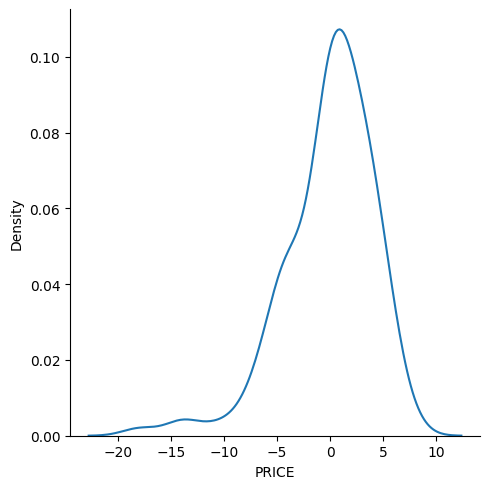

In [61]:
sbn.displot(reg_predict-y_test, kind='kde')

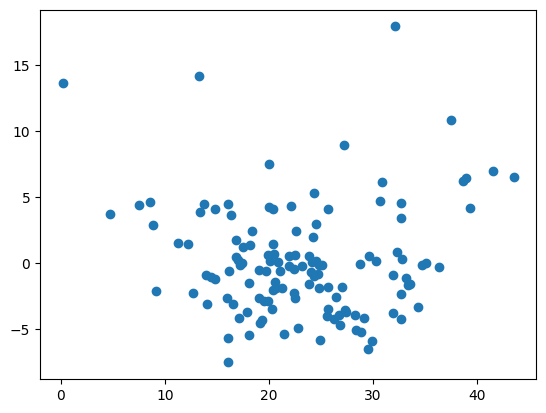

In [62]:
plt.scatter(reg_predict, y_test - reg_predict)

In [63]:
y_test_temp = y_test.array

In [64]:
from sklearn.metrics import root_mean_squared_error

error = root_mean_squared_error(y_test, reg_predict)

print(error)

4.216480323810567


# Pickle the file to use it for further process

In [65]:
pickle.dump(linear_regression, open('reg_predict.pickle', 'wb'))

In [66]:
pickle.dump(scalar, open('scalar.pickle', 'wb'))